In [27]:
import pandas as panda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nump


#Reading Nationwide employment rate Data from csv file using specfied columns
emp_columns = [ 'emp_combined_inclow', 'emp_combined_incmiddle', 'emp_combined_inchigh', 'emp_combined_advance']
file_path = "/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/Project_Data/EmploymentCombined-National-Daily.csv"
emp_data = panda.read_csv(file_path,skiprows = [i for i in range(1,14)]) 
emp_data= emp_data.drop(emp_columns,axis=1)


#printing the results of csv data reading
total_nrows = len(emp_data.index)
emp_data.head(10)



,year,month,day,emp_combined,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
0,2020,1,27,0.00518,.00334,.00421,.00762,.00462
1,2020,1,28,0.00542,.00337,.00429,.00809,.00493
2,2020,1,29,0.00563,.00336,.00435,.00854,.00524
3,2020,1,30,0.00582,.00332,.00439,.00897,.00557
4,2020,1,31,0.00600,.00328,.00443,.00937,.00592
5,2020,2,1,0.00617,.00325,.00446,.00974,.00626
6,2020,2,2,0.00633,.00323,.00449,.0101,.00664
7,2020,2,3,0.00651,.00322,.00455,.0105,.00705
8,2020,2,4,0.00671,.00321,.00463,.0109,.00754
9,2020,2,5,0.00692,.00323,.00476,.0113,.00803


In [28]:
#Reading Nationwide COVID-19 case rates' Data from csv file using specfied columns
cov_case_cols = ['year', 'month', 'day', 'case_rate', 'new_case_rate']
file_path = "/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/Project_Data/COVID-National-Daily.csv"
covid_cases_df = panda.read_csv(file_path, usecols = cov_case_cols,skiprows = [1,2,3,4,5,6],nrows = len(emp_data.index))

#printing the results of csv data reading
covid_cases_df.tail(10)


,year,month,day,case_rate,new_case_rate
274,2020,10,27,2675.0,22.0
275,2020,10,28,2700.0,22.8
276,2020,10,29,2727.0,23.5
277,2020,10,30,2757.0,24.1
278,2020,10,31,2783.0,24.4
279,2020,11,1,2805.0,25.0
280,2020,11,2,2833.0,25.8
281,2020,11,3,2861.0,26.6
282,2020,11,4,2894.0,27.7
283,2020,11,5,2931.0,29.1


In [29]:
#Using function to print number of missing values in the dataset
def verifyMissingValuesInData(fileData):
    print(fileData.isnull().sum())
    return

#Using function to replace string values in 'Dependents' to integer 
def replaceStringtoInt(fileData):
    for i in list(fileData.columns):
        fileData[i] = fileData[i].replace(".",0)
    return fileData

#Calling above function to get total missing values in each data feature before cleaning
print("Total Missing or 'NaN' values in Employee dataset are: \n")
verifyMissingValuesInData(emp_data)

#Calling above function to get clean dataset without missing values and integer replacing string value
clean_file_data = replaceStringtoInt(emp_data)

emp_data.tail(10)

Total Missing or 'NaN' values in Employee dataset are: 

year                 0
month                0
day                  0
emp_combined         0
emp_combined_ss40    0
emp_combined_ss60    0
emp_combined_ss65    0
emp_combined_ss70    0
dtype: int64


,year,month,day,emp_combined,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
274,2020,10,27,-0.0658,0,0,0,0
275,2020,10,28,-0.0659,0,0,0,0
276,2020,10,29,-0.0659,0,0,0,0
277,2020,10,30,-0.0659,0,0,0,0
278,2020,10,31,-0.0660,0,0,0,0
279,2020,11,1,-0.0660,0,0,0,0
280,2020,11,2,-0.0655,0,0,0,0
281,2020,11,3,-0.0651,0,0,0,0
282,2020,11,4,-0.0650,0,0,0,0
283,2020,11,5,-0.0651,0,0,0,0


In [30]:
#Calling above function to get total missing values in each data feature of Covid cases before cleaning
print("Total Missing or 'NaN' values in Covid cases dataset are: \n")
verifyMissingValuesInData(covid_cases_df)

covid_cases_df.tail(10)


Total Missing or 'NaN' values in Covid cases dataset are: 

year             0
month            0
day              0
case_rate        0
new_case_rate    0
dtype: int64


,year,month,day,case_rate,new_case_rate
274,2020,10,27,2675.0,22.0
275,2020,10,28,2700.0,22.8
276,2020,10,29,2727.0,23.5
277,2020,10,30,2757.0,24.1
278,2020,10,31,2783.0,24.4
279,2020,11,1,2805.0,25.0
280,2020,11,2,2833.0,25.8
281,2020,11,3,2861.0,26.6
282,2020,11,4,2894.0,27.7
283,2020,11,5,2931.0,29.1


In [31]:
#Using functions to describe the dataset
def descData(fileData,name):
    print("\nDimension of the "+name+" dataset: \n",fileData.shape)
    print("\nData Types of the "+name+" dataset: \n",fileData.dtypes)
    print("\nView of the first 10 records of "+name+" dataset: \n",fileData.head(10))
    print("\nSummary of the "+name+" dataset: \n",fileData.describe())
    return

#Calling above function to print dataset description
descData(emp_data,"Employment")

emp_columns = ['emp_combined', 'emp_combined_ss40', 'emp_combined_ss60','emp_combined_ss65','emp_combined_ss70']

for each in emp_columns:
    emp_data[each] = panda.to_numeric(emp_data[each])
    
    
print("\n\n----------after conversion of dtypes------------------------------------")
descData(emp_data,"Employment")



Dimension of the Employment dataset: 
 (284, 8)

Data Types of the Employment dataset: 
 year                   int64
month                  int64
day                    int64
emp_combined         float64
emp_combined_ss40     object
emp_combined_ss60     object
emp_combined_ss65     object
emp_combined_ss70     object
dtype: object

View of the first 10 records of Employment dataset: 
    year  month  day  emp_combined emp_combined_ss40 emp_combined_ss60  \
0  2020      1   27       0.00518            .00334            .00421   
1  2020      1   28       0.00542            .00337            .00429   
2  2020      1   29       0.00563            .00336            .00435   
3  2020      1   30       0.00582            .00332            .00439   
4  2020      1   31       0.00600            .00328            .00443   
5  2020      2    1       0.00617            .00325            .00446   
6  2020      2    2       0.00633            .00323            .00449   
7  2020      2    3      

In [32]:
#Calling above function to print dataset description
descData(covid_cases_df,"Covid Cases")


Dimension of the Covid Cases dataset: 
 (284, 5)

Data Types of the Covid Cases dataset: 
 year               int64
month              int64
day                int64
case_rate        float64
new_case_rate    float64
dtype: object

View of the first 10 records of Covid Cases dataset: 
    year  month  day  case_rate  new_case_rate
0  2020      1   27    0.00152       0.000174
1  2020      1   28    0.00152       0.000174
2  2020      1   29    0.00152       0.000174
3  2020      1   30    0.00183       0.000218
4  2020      1   31    0.00213       0.000218
5  2020      2    1    0.00244       0.000218
6  2020      2    2    0.00335       0.000261
7  2020      2    3    0.00335       0.000261
8  2020      2    4    0.00335       0.000261
9  2020      2    5    0.00366       0.000305

Summary of the Covid Cases dataset: 
          year       month         day    case_rate  new_case_rate
count   284.0  284.000000  284.000000   284.000000     284.000000
mean   2020.0    6.024648   15.73943

In [33]:
emp_data.insert(0,'Date',['-'.join(i) for i in zip(emp_data["year"].map(str),emp_data["month"].map(str),emp_data['day'].map(str))])
emp_data['Date'] = panda.to_datetime(emp_data['Date'], format='%Y-%m-%d')
emp_data.set_index('Date', inplace=True, drop=False)
emp_data = emp_data.drop(emp_data.columns[[0,1, 2, 3]], axis=1) 


emp_data.head(10)


,emp_combined,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
Date,,,,,
2020-01-27,0.00518,0.00334,0.00421,0.00762,0.00462
2020-01-28,0.00542,0.00337,0.00429,0.00809,0.00493
2020-01-29,0.00563,0.00336,0.00435,0.00854,0.00524
2020-01-30,0.00582,0.00332,0.00439,0.00897,0.00557
2020-01-31,0.00600,0.00328,0.00443,0.00937,0.00592
2020-02-01,0.00617,0.00325,0.00446,0.00974,0.00626
2020-02-02,0.00633,0.00323,0.00449,0.01010,0.00664
2020-02-03,0.00651,0.00322,0.00455,0.01050,0.00705
2020-02-04,0.00671,0.00321,0.00463,0.01090,0.00754


In [34]:
covid_cases_df.insert(0,'Date',['-'.join(i) for i in zip(covid_cases_df["year"].map(str),covid_cases_df["month"].map(str),covid_cases_df['day'].map(str))])
covid_cases_df['Date'] = panda.to_datetime(covid_cases_df['Date'], format='%Y-%m-%d')
covid_cases_df.set_index('Date', inplace=True, drop=False)
covid_cases_df = covid_cases_df.drop(covid_cases_df.columns[[0,1, 2, 3]], axis=1) 

covid_cases_df.head(10)


,case_rate,new_case_rate
Date,,
2020-01-27,0.00152,0.000174
2020-01-28,0.00152,0.000174
2020-01-29,0.00152,0.000174
2020-01-30,0.00183,0.000218
2020-01-31,0.00213,0.000218
2020-02-01,0.00244,0.000218
2020-02-02,0.00335,0.000261
2020-02-03,0.00335,0.000261
2020-02-04,0.00335,0.000261


In [35]:
path = "/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/Processed_Project_Data/CleanEmployment_data.csv"
emp_data.to_csv(path,index=False)
emp_data.head(5)


,emp_combined,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
Date,,,,,
2020-01-27,0.00518,0.00334,0.00421,0.00762,0.00462
2020-01-28,0.00542,0.00337,0.00429,0.00809,0.00493
2020-01-29,0.00563,0.00336,0.00435,0.00854,0.00524
2020-01-30,0.00582,0.00332,0.00439,0.00897,0.00557
2020-01-31,0.00600,0.00328,0.00443,0.00937,0.00592


In [36]:
path = "/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/Processed_Project_Data/Cleaned_Covid_Cases_data.csv"
covid_cases_df.to_csv(path,index=False)
covid_cases_df.head(5)


,case_rate,new_case_rate
Date,,
2020-01-27,0.00152,0.000174
2020-01-28,0.00152,0.000174
2020-01-29,0.00152,0.000174
2020-01-30,0.00183,0.000218
2020-01-31,0.00213,0.000218


In [37]:
lo2_data = panda.concat([emp_data, covid_cases_df], axis=1, sort=False)

lo2_data.head(10)

,emp_combined,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,case_rate,new_case_rate
Date,,,,,,,
2020-01-27,0.00518,0.00334,0.00421,0.00762,0.00462,0.00152,0.000174
2020-01-28,0.00542,0.00337,0.00429,0.00809,0.00493,0.00152,0.000174
2020-01-29,0.00563,0.00336,0.00435,0.00854,0.00524,0.00152,0.000174
2020-01-30,0.00582,0.00332,0.00439,0.00897,0.00557,0.00183,0.000218
2020-01-31,0.00600,0.00328,0.00443,0.00937,0.00592,0.00213,0.000218
2020-02-01,0.00617,0.00325,0.00446,0.00974,0.00626,0.00244,0.000218
2020-02-02,0.00633,0.00323,0.00449,0.01010,0.00664,0.00335,0.000261
2020-02-03,0.00651,0.00322,0.00455,0.01050,0.00705,0.00335,0.000261
2020-02-04,0.00671,0.00321,0.00463,0.01090,0.00754,0.00335,0.000261


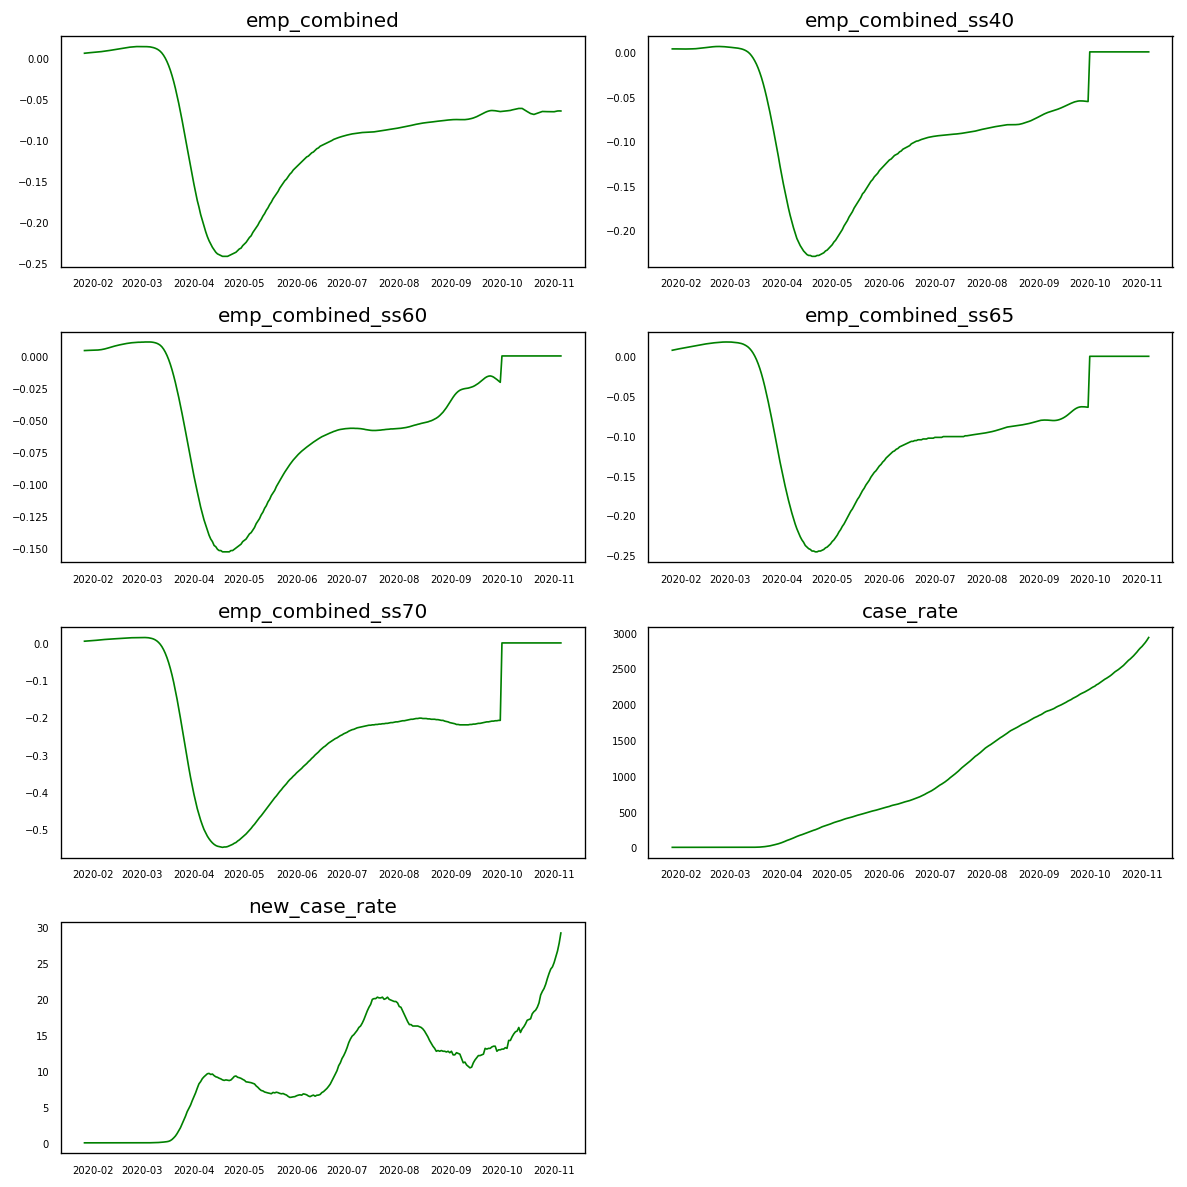

In [38]:
# Univariate Plots for each time series variables

fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,10))
fig.delaxes(axes[3,1])
for i, ax in enumerate(fig.axes):
    data = lo2_data[lo2_data.columns[i]]
    data1 = data.fillna('0')
    ax.plot(data1, color='green', linewidth=1)
    ax.set_title(lo2_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/univar_plot_LO2.png")
plt.show()

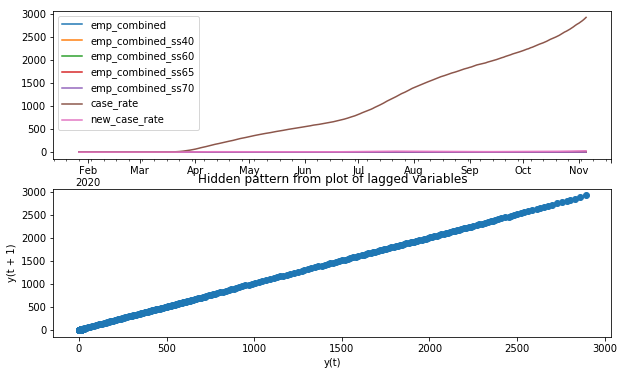

In [39]:
data = lo2_data.fillna('0')
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
plt.title('Hidden pattern from plot of lagged variables')
data.plot(ax=ax1)
panda.plotting.lag_plot(data)
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/lag_plot_LO2.png")
plt.show()

In [40]:
#Splitting the dataset into Train and Test series

lo2_data_train = lo2_data[:int(0.8*(len(lo2_data)))]
lo2_data_test = lo2_data[int(0.8*(len(lo2_data))):]

print("Dimension for the Training Dataset: ",lo2_data_train.shape)
print("Dimension for the Testing Dataset: ",lo2_data_test.shape)


Dimension for the Training Dataset:  (227, 7)
Dimension for the Testing Dataset:  (57, 7)


In [41]:
#Using function to run Augmented Dickey-Fuller Test (ADF Test) to check for stationarity in the dataset

from statsmodels.tsa.stattools import adfuller

def Stationary_test_ADF(dataset):
    for i in dataset.columns:
        print("\n\nADF test for Column: '"+i+"':")
        print('--------------------------------------')
        adf_test = adfuller(dataset[i], autolag='AIC')
        adf = panda.Series(adf_test[0:4], index = ['Test Statistic : ','p-value : ','No_lags : ','No_Obsv : '])

        for key, value in adf_test[4].items():
           adf['Critical Value for %s : '%key] = value
        print (adf)
    return
        
    
Stationary_test_ADF(lo2_data_train)
    



ADF test for Column: 'emp_combined':
--------------------------------------
Test Statistic :              -2.923611
p-value :                      0.042670
No_lags :                     13.000000
No_Obsv :                    213.000000
Critical Value for 1% :       -3.461429
Critical Value for 5% :       -2.875207
Critical Value for 10% :      -2.574054
dtype: float64


ADF test for Column: 'emp_combined_ss40':
--------------------------------------
Test Statistic :              -3.318137
p-value :                      0.014087
No_lags :                     15.000000
No_Obsv :                    211.000000
Critical Value for 1% :       -3.461727
Critical Value for 5% :       -2.875337
Critical Value for 10% :      -2.574124
dtype: float64


ADF test for Column: 'emp_combined_ss60':
--------------------------------------
Test Statistic :              -2.677570
p-value :                      0.078001
No_lags :                     11.000000
No_Obsv :                    215.000000
Critic

In [42]:
# Differencing all variables to get rid of Stationarity
lo2_train_diff_1 = lo2_data_train.diff().dropna()
print('---------------------------------------After First Difference---------------------------------')
Stationary_test_ADF(lo2_train_diff_1)


---------------------------------------After First Difference---------------------------------


ADF test for Column: 'emp_combined':
--------------------------------------
Test Statistic :              -1.826794
p-value :                      0.367243
No_lags :                     12.000000
No_Obsv :                    213.000000
Critical Value for 1% :       -3.461429
Critical Value for 5% :       -2.875207
Critical Value for 10% :      -2.574054
dtype: float64


ADF test for Column: 'emp_combined_ss40':
--------------------------------------
Test Statistic :              -1.736213
p-value :                      0.412557
No_lags :                     13.000000
No_Obsv :                    212.000000
Critical Value for 1% :       -3.461578
Critical Value for 5% :       -2.875272
Critical Value for 10% :      -2.574089
dtype: float64


ADF test for Column: 'emp_combined_ss60':
--------------------------------------
Test Statistic :              -2.228196
p-value :                      

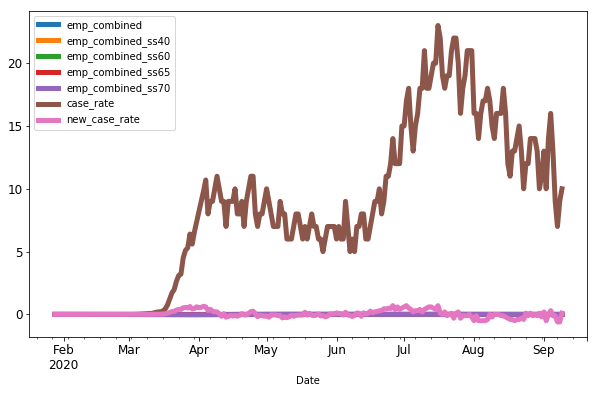

In [43]:
lo2_train_diff_1.plot(figsize=(10,6),linewidth = 5, fontsize = 12)
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/I1_plot_LO2.png")
plt.show()

------------------------------------------After Second Difference---------------------------------


ADF test for Column: 'emp_combined':
--------------------------------------
Test Statistic :              -4.659803
p-value :                      0.000100
No_lags :                     11.000000
No_Obsv :                    213.000000
Critical Value for 1% :       -3.461429
Critical Value for 5% :       -2.875207
Critical Value for 10% :      -2.574054
dtype: float64


ADF test for Column: 'emp_combined_ss40':
--------------------------------------
Test Statistic :              -3.521063
p-value :                      0.007462
No_lags :                     15.000000
No_Obsv :                    209.000000
Critical Value for 1% :       -3.462032
Critical Value for 5% :       -2.875471
Critical Value for 10% :      -2.574195
dtype: float64


ADF test for Column: 'emp_combined_ss60':
--------------------------------------
Test Statistic :              -3.973219
p-value :                  

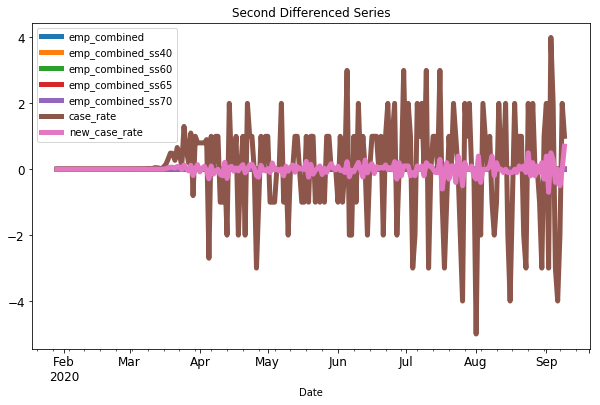

In [44]:
lo2_train_diff_2 = lo2_train_diff_1.diff().dropna()
print('------------------------------------------After Second Difference---------------------------------')
Stationary_test_ADF(lo2_train_diff_2)

lo2_train_diff_2.plot(figsize=(10,6),linewidth = 5, fontsize = 12)
plt.title('Second Differenced Series')
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/I2_plot_LO2.png")
plt.show()

------------------------------------------After Third Difference---------------------------------


ADF test for Column: 'emp_combined':
--------------------------------------
Test Statistic :              -3.371188
p-value :                      0.011981
No_lags :                      9.000000
No_Obsv :                    214.000000
Critical Value for 1% :       -3.461282
Critical Value for 5% :       -2.875143
Critical Value for 10% :      -2.574020
dtype: float64


ADF test for Column: 'emp_combined_ss40':
--------------------------------------
Test Statistic :              -4.765230
p-value :                      0.000063
No_lags :                     15.000000
No_Obsv :                    208.000000
Critical Value for 1% :       -3.462186
Critical Value for 5% :       -2.875538
Critical Value for 10% :      -2.574231
dtype: float64


ADF test for Column: 'emp_combined_ss60':
--------------------------------------
Test Statistic :              -4.670166
p-value :                   

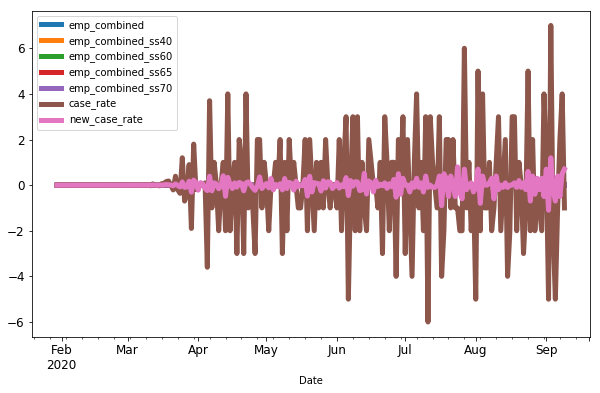

In [45]:
lo2_train_diff_3 = lo2_train_diff_2.diff().dropna()
print('------------------------------------------After Third Difference---------------------------------')
Stationary_test_ADF(lo2_train_diff_3)

lo2_train_diff_3.plot(figsize=(10,6),linewidth = 5, fontsize = 12)
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/I3_plot_LO2.png")
plt.show()

In [46]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

#Using function to run cointegration test on all time series variables in the dataset.
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,1,3)
    traces = out.lr1
    cvts = out.cvt[:, 1]
    def adjust(val, length= 6): return str(val).ljust(length)

    print('TS variable  |    Max Eigen Test Statistic > or < C(95%)    |   Signif  \n')
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(col, '-', round(trace,2), ">" if trace > cvt else "<", cvt, ' ->  ' , trace > cvt)

cointegration_test(lo2_train_diff_3)


TS variable  |    Max Eigen Test Statistic > or < C(95%)    |   Signif  

emp_combined - 1168.65 > 139.278  ->   True
emp_combined_ss40 - 885.63 > 107.3429  ->   True
emp_combined_ss60 - 662.44 > 79.3422  ->   True
emp_combined_ss65 - 481.99 > 55.2459  ->   True
emp_combined_ss70 - 317.71 > 35.0116  ->   True
case_rate - 189.83 > 18.3985  ->   True
new_case_rate - 75.93 > 3.8415  ->   True


In [47]:
from statsmodels.tsa.stattools import grangercausalitytests

#Using function to run granger's causation matrix for time series variables in the dataset.
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = panda.DataFrame(nump.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=7, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(7)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = nump.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


grangers_causation_matrix(lo2_data, variables = lo2_train_diff_3.columns) 


,emp_combined_x,emp_combined_ss40_x,emp_combined_ss60_x,emp_combined_ss65_x,emp_combined_ss70_x,case_rate_x,new_case_rate_x
emp_combined_y,1.000,0.4892,0.1563,0.1351,0.028,0.0000,0.0023
emp_combined_ss40_y,0.000,1.0000,0.0000,0.0000,0.000,0.0000,0.0000
emp_combined_ss60_y,0.000,0.0000,1.0000,0.0000,0.000,0.0000,0.0002
emp_combined_ss65_y,0.000,0.0000,0.0000,1.0000,0.000,0.0001,0.0001
emp_combined_ss70_y,0.000,0.0000,0.0000,0.0000,1.000,0.0007,0.0001
case_rate_y,0.000,0.0000,0.0000,0.0000,0.000,1.0000,0.0000
new_case_rate_y,0.015,0.0000,0.0000,0.0000,0.000,0.0000,1.0000


In [48]:
from statsmodels.tsa.vector_ar import vecm

vec_rank1 = vecm.select_coint_rank(lo2_data_train, det_order = 1, k_ar_diff = 3, method = 'trace', signif=0.05)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   7          290.1          139.3
  1   7          182.8          107.3
  2   7          112.9          79.34
  3   7          74.09          55.25
  4   7          38.76          35.01
  5   7          15.78          18.40
-------------------------------------


In [49]:
vec_rank2 = vecm.select_coint_rank(lo2_data_train, det_order = 1, k_ar_diff = 3, method = 'maxeig', signif=0.05)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          107.2          49.59
  1   2          69.95          43.42
  2   3          38.77          37.16
  3   4          35.33          30.82
  4   5          22.98          24.25
-------------------------------------


In [50]:
vecm_model = vecm.VECM(endog = lo2_data_train, k_ar_diff = 7, coint_rank = 5, deterministic = "ci")
vecm_model_fit = vecm_model.fit()
vecm_model_fit.predict(steps=len(lo2_data_test))


array([[-7.57778933e-02, -6.52071388e-02, -2.58903955e-02,
        -8.12311109e-02, -2.17716327e-01,  1.94257142e+03,
         1.08868530e+01],
       [-7.56633755e-02, -6.47495179e-02, -2.62621923e-02,
        -8.15334288e-02, -2.14592361e-01,  1.95528369e+03,
         1.04224681e+01],
       [-7.49459519e-02, -6.38554780e-02, -2.69866282e-02,
        -8.18415755e-02, -2.11008215e-01,  1.96546436e+03,
         1.00945111e+01],
       [-7.37527285e-02, -6.28237584e-02, -2.78916032e-02,
        -8.16399386e-02, -2.05064986e-01,  1.97199483e+03,
         9.63535538e+00],
       [-7.26897789e-02, -6.19380591e-02, -2.84820842e-02,
        -8.10218858e-02, -1.96988061e-01,  1.97759754e+03,
         9.37118042e+00],
       [-7.06419167e-02, -6.03182087e-02, -2.93842740e-02,
        -7.98700028e-02, -1.86427506e-01,  1.98349999e+03,
         9.10850194e+00],
       [-6.75999273e-02, -5.83562921e-02, -2.98690745e-02,
        -7.84373902e-02, -1.73429338e-01,  1.99053805e+03,
         8.6200504

In [51]:
forecast, lower, upper = vecm_model_fit.predict(len(lo2_data_test), 0.05)
forecast_df = panda.DataFrame(forecast, index = lo2_data_test.index, columns=lo2_data_test.columns+'_forecasted')
lower_df = panda.DataFrame(lower, index = lo2_data_test.index, columns=lo2_data_test.columns+'_lower')
upper_df = panda.DataFrame(upper, index = lo2_data_test.index, columns=lo2_data_test.columns+'_upper')


print('lower bounds of confidence intervals:')
print(lower.round(3))
print('\npoint forecasts:')
print(forecast.round(3))
print('\nupper bounds of confidence intervals:')
print(upper.round(3))

lower bounds of confidence intervals:
[[-7.600000e-02 -6.600000e-02 -2.600000e-02 -8.200000e-02 -2.190000e-01
   1.941033e+03  1.067300e+01]
 [-7.600000e-02 -6.500000e-02 -2.700000e-02 -8.200000e-02 -2.160000e-01
   1.952586e+03  1.004500e+01]
 [-7.600000e-02 -6.500000e-02 -2.800000e-02 -8.300000e-02 -2.140000e-01
   1.961648e+03  9.556000e+00]
 [-7.500000e-02 -6.400000e-02 -2.900000e-02 -8.300000e-02 -2.090000e-01
   1.967015e+03  8.929000e+00]
 [-7.500000e-02 -6.400000e-02 -3.000000e-02 -8.300000e-02 -2.030000e-01
   1.971477e+03  8.504000e+00]
 [-7.300000e-02 -6.300000e-02 -3.200000e-02 -8.200000e-02 -1.940000e-01
   1.976211e+03  8.073000e+00]
 [-7.100000e-02 -6.100000e-02 -3.300000e-02 -8.200000e-02 -1.840000e-01
   1.981911e+03  7.392000e+00]
 [-6.900000e-02 -6.000000e-02 -3.400000e-02 -8.000000e-02 -1.710000e-01
   1.989766e+03  6.885000e+00]
 [-6.500000e-02 -5.700000e-02 -3.400000e-02 -7.800000e-02 -1.550000e-01
   1.997490e+03  6.382000e+00]
 [-6.000000e-02 -5.400000e-02 -3.40

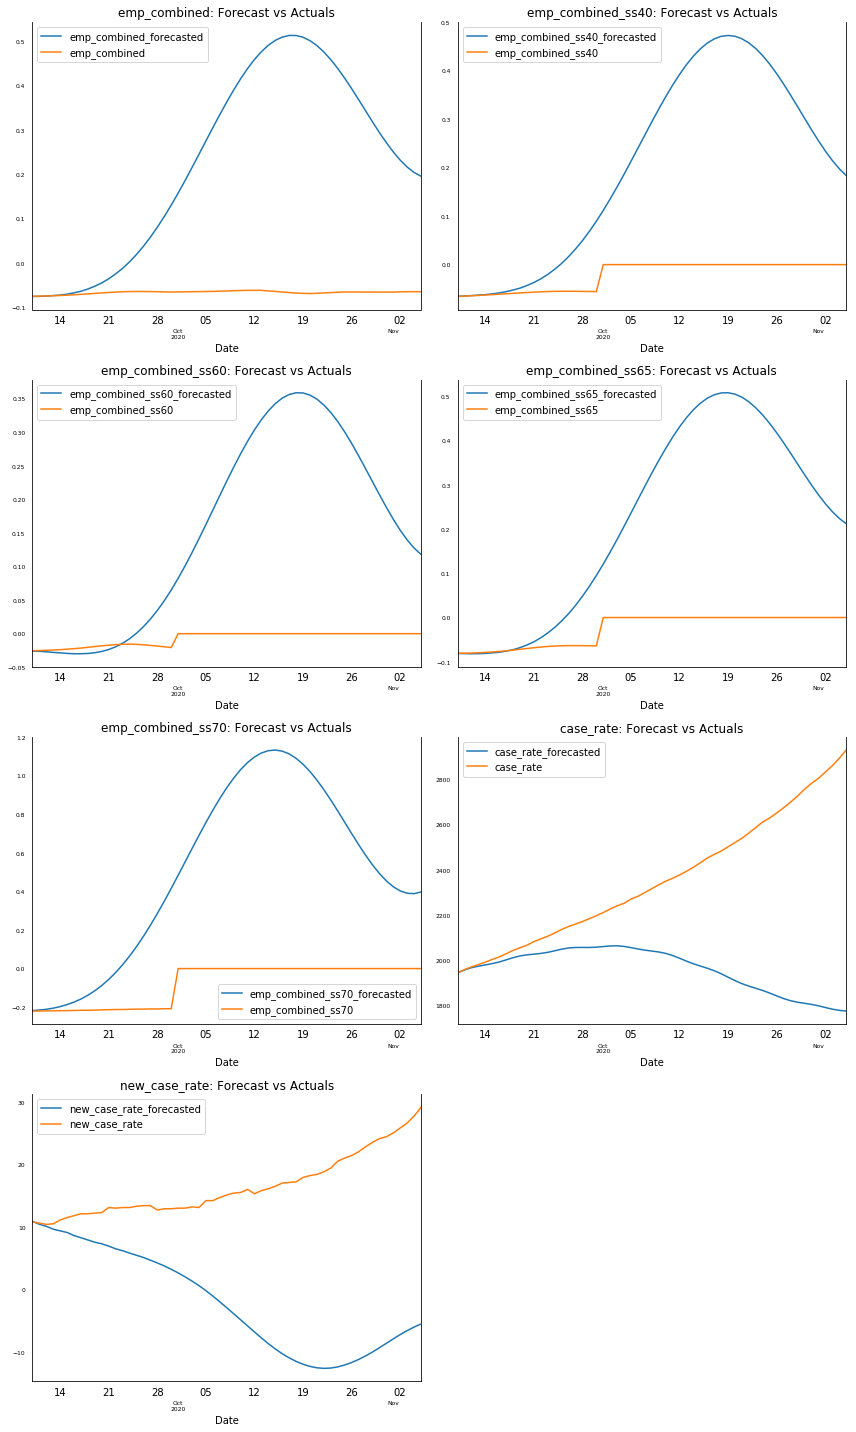

In [52]:
fig, axes = plt.subplots(4, 2, figsize=(12,20))

fig.delaxes(axes[3,1])
for i, (col,ax) in enumerate(zip(lo2_data.columns, fig.axes)):
    forecast_df[col+'_forecasted'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    lo2_data_test[col][-len(lo2_data_test):].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.savefig("/Users/harikaporalla/Desktop/Harika's_MS_Courses/INFO_5082/Project/fc_Ac_LO2.png")
plt.show();

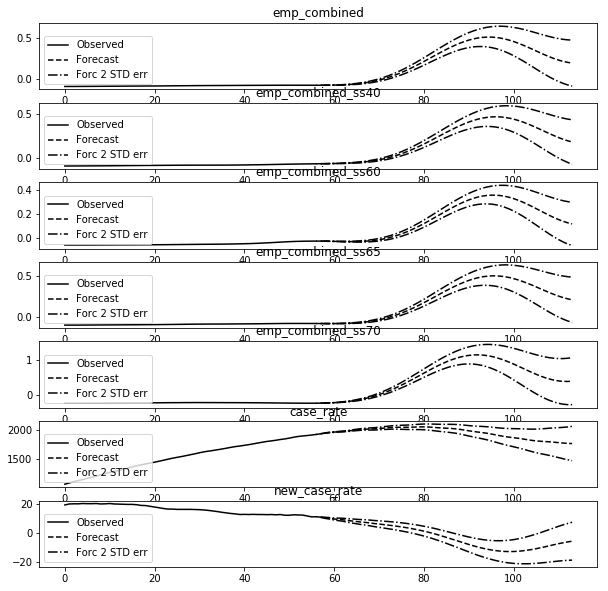

In [53]:
vecm_model_fit.plot_forecast(steps=len(lo2_data_test), n_last_obs=len(lo2_data_test))



In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def forecast_errors(fc_series,test_series):
    fc_errors = [test_series[i]-fc_series[i] for i in range(len(lo2_data_test))]
    bias = sum(fc_errors)*1.0/len(lo2_data_test)
    print(f'\n->For  Column "{test_series.name}"',"\n")
    print("  Bias:",bias)
    
    mae = mean_absolute_error(test_series,fc_series)
    print("\n  MAE:",mae)
    
    mse = mean_squared_error(test_series,fc_series)
    print("\n  MSE:",mse)
    
    print("\n  RMSE:",nump.sqrt(mse))
    
    return

for i in list(lo2_data_test.columns):
    forecast_errors(forecast_df[i+'_forecasted'],lo2_data_test[i])
    


->For  Column "emp_combined" 

  Bias: -0.2908333410838823

  MAE: 0.2908749979502743

  MSE: 0.12758337743383094

  RMSE: 0.35718815410625104

->For  Column "emp_combined_ss40" 

  Bias: -0.2233554665231427

  MAE: 0.2233554665231427

  MSE: 0.07863609480234018

  RMSE: 0.28042128093698626

->For  Column "emp_combined_ss60" 

  Bias: -0.15947677477581126

  MAE: 0.16196366792999808

  MSE: 0.043354841589536536

  RMSE: 0.20821825469813288

->For  Column "emp_combined_ss65" 

  Bias: -0.240758688177329

  MAE: 0.24117729457504242

  MSE: 0.09202906429586365

  RMSE: 0.3033629250516016

->For  Column "emp_combined_ss70" 

  Bias: -0.5722428149204202

  MAE: 0.5722428149204202

  MSE: 0.46538843554171816

  RMSE: 0.6821938401522827

->For  Column "case_rate" 

  Bias: 395.1591446911739

  MAE: 395.17919456445054

  MSE: 284957.59066135495

  RMSE: 533.814191138972

->For  Column "new_case_rate" 

  Bias: 18.318771108430727

  MAE: 18.32181858344395

  MSE: 481.23965482444265

  RMSE: 21